# Day 11: Time‑Series Exploratory Analysis


---

## 1. Overview

Today’s goals are to:

- Understand autocorrelation and partial autocorrelation  
- Generate ACF/PACF plots for my solar-irradiance series  
- Perform a seasonal decomposition (trend, seasonality, residuals)  
- Interpret the results to inform forecasting models  

---

## 2. Setup & Data Load

In this cell, I will:

1. **Import** the required libraries (`pandas`, `matplotlib`, `statsmodels`)  
2. **Load** my `solar_irr.csv` (Jan 1–Apr 30, 2025) with `parse_dates` and set `date` as index

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and index
solar = pd.read_csv("../../week1/day6/solar_irr.csv", parse_dates=["date"])
solar.set_index("date", inplace=True)
series = solar["irradiance_kwh"]

---

## 3. Plotting the Raw Series

In this cell, I will:

- Plot the time series to visually inspect trend & variance

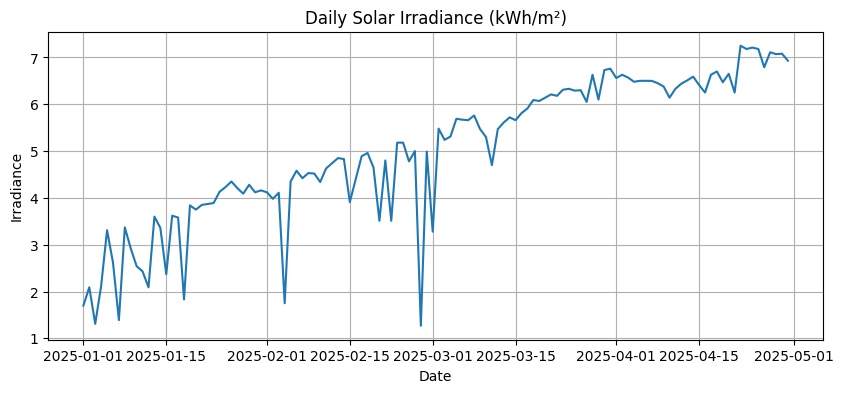

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title("Daily Solar Irradiance (kWh/m²)")
plt.xlabel("Date")
plt.ylabel("Irradiance")
plt.grid(True)
plt.show()

---

## 4. Autocorrelation & Partial Autocorrelation

In this cell, I will:

- Generate the ACF (lags vs. auto‑correlation)

- Generate the PACF (lags vs. partial auto‑correlation)

<Figure size 800x300 with 0 Axes>

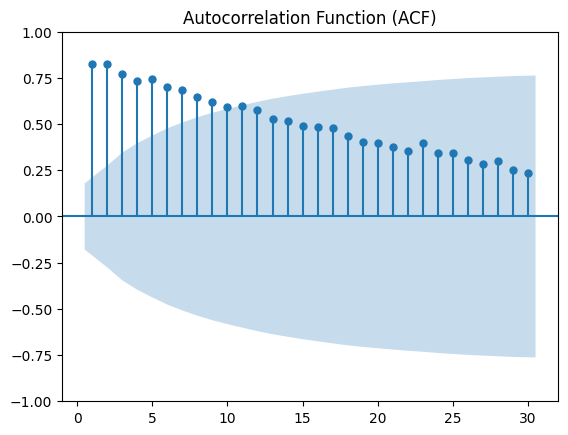

<Figure size 800x300 with 0 Axes>

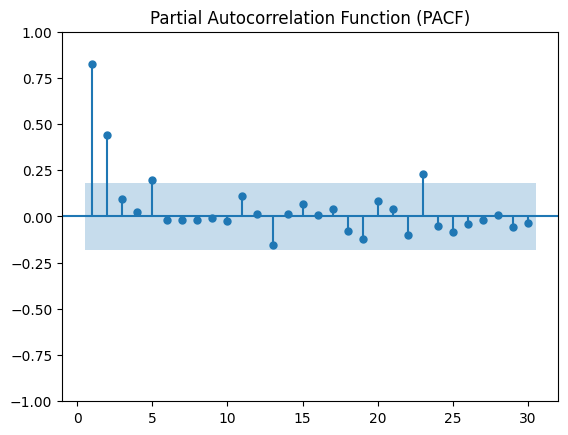

In [5]:
# ACF
plt.figure(figsize=(8,3))
plot_acf(series, lags=30, zero=False)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# PACF
plt.figure(figsize=(8,3))
plot_pacf(series, lags=30, zero=False, method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

---

## 5. Seasonal Decomposition

In this cell, I will:

- Decompose the series into trend, seasonal, and residual components

- Use an additive model assuming seasonality is consistent

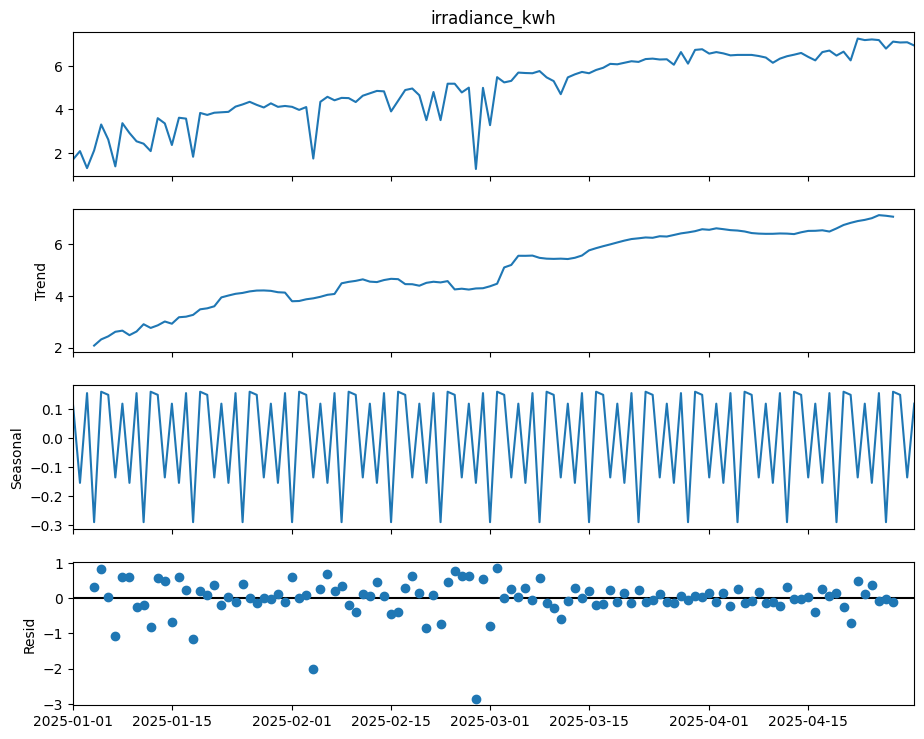

In [6]:
result = seasonal_decompose(series, model="additive", period=7)
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()